In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


knicksdf = pd.read_csv('C:/Users/almad/OneDrive/Desktop/Knicks/KNICKS_PBP_2019_2023.csv')

In [71]:
#Games in our dataset

knicksdf['Date'].nunique()

307

In [72]:
knicksdf.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201910230SAS.html,regular,AT&T Center San Antonio Texas,October 23 2019,8:30 PM,SAS,1,720,NYK,Jump ball: B. Portis vs. L. Aldridge (J. Randl...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B. Portis - portibo01,L. Aldridge - aldrila01,J. Randle - randlju01
1,/boxscores/201910230SAS.html,regular,AT&T Center San Antonio Texas,October 23 2019,8:30 PM,SAS,1,704,NYK,M. Morris makes 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910230SAS.html,regular,AT&T Center San Antonio Texas,October 23 2019,8:30 PM,SAS,1,687,NYK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910230SAS.html,regular,AT&T Center San Antonio Texas,October 23 2019,8:30 PM,SAS,1,682,NYK,Defensive rebound by M. Morris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910230SAS.html,regular,AT&T Center San Antonio Texas,October 23 2019,8:30 PM,SAS,1,674,NYK,B. Portis misses 2-pt layup from 1 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
knicksdf.drop('URL', axis=1, inplace=True)

# Drop location column
knicksdf.drop('Location', axis=1, inplace=True)

# drop ViolationType column
knicksdf.drop('ViolationType', axis=1, inplace=True)

# drop ViolationPlayer column
knicksdf.drop('ViolationPlayer', axis=1, inplace=True)

# drop TimeoutTeam column
knicksdf.drop('TimeoutTeam', axis=1, inplace=True)

# drop FreeThrowShooter column
knicksdf.drop('FreeThrowShooter', axis=1, inplace=True)

# drop FreeThrowOutcome column
knicksdf.drop('FreeThrowOutcome', axis=1, inplace=True)

# drop FreeThrowNum column
knicksdf.drop('FreeThrowNum', axis=1, inplace=True)

# drop FoulType column
knicksdf.drop('FoulType', axis=1, inplace=True)


# drop Fouled column
knicksdf.drop('Fouled', axis=1, inplace=True)

# Drop TurnoverType column
knicksdf.drop('TurnoverType', axis=1, inplace=True)

# drop TurnoverCauser column
knicksdf.drop('TurnoverCauser', axis=1, inplace=True)

# drop TurnoverCause column
knicksdf.drop('TurnoverCause', axis=1, inplace=True)


# drop EnterGame and LeaveGame columns
knicksdf.drop('EnterGame', axis=1, inplace=True)
knicksdf.drop('LeaveGame', axis=1, inplace=True)

# JumpballAwayPlayer and JumpballHomePlayer and JumpballPoss column
knicksdf.drop('JumpballAwayPlayer', axis=1, inplace=True)
knicksdf.drop('JumpballHomePlayer', axis=1, inplace=True)
knicksdf.drop('JumpballPoss', axis=1, inplace=True)

# Drop Quarter column
knicksdf.drop('Quarter', axis=1, inplace=True)

# Drop SecLeft column
knicksdf.drop('SecLeft', axis=1, inplace=True)

knicksdf['Time'] = pd.to_datetime(knicksdf['Time'])

# convert the time to hours
knicksdf['Time'] = knicksdf['Time'].apply(lambda x: x.hour + x.minute / 60)

# create a new column called 'KnicksWin' to indicate whether the knicks won or lost the game
knicksdf.loc[knicksdf['WinningTeam'] == 'NYK', 'KnicksWin'] = 1

knicksdf.loc[knicksdf['WinningTeam'] != 'NYK', 'KnicksWin'] = 0

knicksdf['GameType'] = knicksdf['GameType'].apply(lambda x: 1 if x == 'playoff' else 0)

# drop the winning team column
knicksdf.drop('WinningTeam', axis=1, inplace=True)

# drop HomePlay and AwayPlay columns
knicksdf.drop('HomePlay', axis=1, inplace=True)
knicksdf.drop('AwayPlay', axis=1, inplace=True)

# drop the HomeScore and AwayScore columns
knicksdf.drop('HomeScore', axis=1, inplace=True)
knicksdf.drop('AwayScore', axis=1, inplace=True)

# drop the HomeTeam and AwayTeam columns
knicksdf.drop('HomeTeam', axis=1, inplace=True)
knicksdf.drop('AwayTeam', axis=1, inplace=True)

In [74]:
# create a new dataframe with Shooter, ShotType, ShotOutcome, and ShotDist columns
knicksdf2 = knicksdf[['Shooter', 'ShotType', 'ShotOutcome', 'ShotDist', 'KnicksWin', 'Date']]

# drop all rows with NaN values
knicksdf2.dropna(inplace=True)

knicksdf2.head()

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1952818992.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Shooter,ShotType,ShotOutcome,ShotDist,KnicksWin,Date
1,M. Morris - morrima03,2-pt jump shot,make,11.0,0.0,October 23 2019
2,D. Murray - murrade01,2-pt jump shot,miss,17.0,0.0,October 23 2019
4,B. Portis - portibo01,2-pt layup,miss,1.0,0.0,October 23 2019
6,B. Forbes - forbebr01,2-pt jump shot,make,20.0,0.0,October 23 2019
8,L. Aldridge - aldrila01,2-pt jump shot,miss,19.0,0.0,October 23 2019


In [75]:
# Create a new column for 2pt shots
knicksdf2['2pt-jumpshot'] = knicksdf2['ShotType'].apply(lambda x: 1 if x in ['2-pt jump shot'] else 0)

# Create a new column for 3pt shots
knicksdf2['3pt-jumpshot'] = knicksdf2['ShotType'].apply(lambda x: 1 if x == '3-pt jump shot' else 0)

# Create a new column for paint shots
knicksdf2['paint-shot'] = knicksdf2['ShotType'].apply(lambda x: 1 if x in ['2-pt layup', '2-pt dunk', '2-pt hook shot'] else 0)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1149374104.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1149374104.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1149374104.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [76]:
# If shot outcome is make then 1, if shot outcome is miss then 0
knicksdf2['ShotOutcome'] = knicksdf2['ShotOutcome'].apply(lambda x: 1 if x == 'make' else 0)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\3188877304.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
# drop the ShotType column
knicksdf2.drop('ShotType', axis=1, inplace=True)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\2788875172.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
player_list = ['J. Randle - randlju01',
 'R. Barrett - barrerj01',
 'I. Quickley - quickim01',
 'A. Burks - burksal01',
 'E. Fournier - fournev01',
 'E. Payton - paytoel01',
 'J. Brunson - brunsja01',
 'M. Robinson - robinmi01',
 'O. Toppin - toppiob01',
 'D. Rose - rosede01',
 'R. Bullock - bullore01',
 'M. Morris - morrima03',
 'B. Portis - portibo01',
 'T. Gibson - gibsota01',
 'Q. Grimes - grimequ01',
 'K. Knox - knoxke01',
 'K. Walker - walkeke02',
 'F. Ntilikina - ntilila01',
 'D. Dotson - dotsoda01',
 'N. Noel - noelne01',
 'M. McBride - mcbrimi01',
 'I. Hartenstein - harteis01',
 'C. Reddish - reddica01',
 'D. Smith - smithde03',
 'W. Ellington - ellinwa01',
 'A. Rivers - riverau01',
 'J. Sims - simsje01',
 'A. Trier - trieral01',
 'J. Hart - hartjo01',
 'M. Harkless - harklma01',
 'S. Mykhailiuk - mykhasv01',
 'K. Allen - allenka01',
 'I. Brazdeikis - brazdig01',
 'D. House - houseda01',
 'R. Arcidiacono - arcidry01',
 'T. Pinson - pinsoth01',
 'N. Pelle - pelleno01',
 'J. Harper - harpeja01',
 'W. Selden - seldewa01',
 'M. Mooney - moonema01',
 'F. Hunt - huntfe01',
 'T. Keels - keelstr01']

filtered_df = knicksdf2[knicksdf2['Shooter'].isin(player_list)]

filtered_df.head()

,Shooter,ShotOutcome,ShotDist,KnicksWin,Date,2pt-jumpshot,3pt-jumpshot,paint-shot
1,M. Morris - morrima03,1,11.0,0.0,October 23 2019,1,0,0
4,B. Portis - portibo01,0,1.0,0.0,October 23 2019,0,0,1
10,R. Barrett - barrerj01,0,26.0,0.0,October 23 2019,0,1,0
15,M. Morris - morrima03,0,14.0,0.0,October 23 2019,1,0,0
18,J. Randle - randlju01,0,26.0,0.0,October 23 2019,0,1,0


In [79]:
filtered_df['Shooter'].shape

# Add a column called 2pt-shots made, 3pt-shots made, and paint shots made
# If ShotOutcome is 1 and 2pt-jumpshot is 1 then add 1 to total 2pt shots made colum
# If ShotOutcome is 1 and 3pt-jumpshot is 1 then add 1 to total 3pt shots made colum
# If ShotOutcome is 1 and paint-shot is 1 then add 1 to total paint shots made colum
filtered_df['2pt-shots-made'] = filtered_df.apply(lambda x: 1 if x['ShotOutcome'] == 1 and x['2pt-jumpshot'] == 1 else 0, axis=1)
filtered_df['3pt-shots-made'] = filtered_df.apply(lambda x: 1 if x['ShotOutcome'] == 1 and x['3pt-jumpshot'] == 1 else 0, axis=1)
filtered_df['paint-shots-made'] = filtered_df.apply(lambda x: 1 if x['ShotOutcome'] == 1 and x['paint-shot'] == 1 else 0, axis=1)


C:\Users\almad\AppData\Local\Temp\ipykernel_23744\35007608.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\35007608.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\35007608.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [80]:
#  Group by date and knicks win
grouped_df = filtered_df.groupby(['Date', 'KnicksWin']).sum()

grouped_df.head()

,,ShotOutcome,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made
Date,KnicksWin,,,,,,,,
April 10 2022,1.0,42,1463.0,19,48,26,9,17,16
April 11 2021,1.0,35,1169.0,20,35,33,5,9,21
April 12 2021,1.0,42,1119.0,32,27,30,17,5,20
April 14 2021,1.0,44,1359.0,35,33,29,12,17,15
April 16 2021,1.0,47,1297.0,41,30,24,18,14,15


In [81]:
# reset the index
grouped_df.reset_index(inplace=True)

In [82]:
# Create a new column for total shot attempts
grouped_df['TotalShotAttempts'] = grouped_df['2pt-jumpshot'] + grouped_df['3pt-jumpshot'] + grouped_df['paint-shot']

# Field goal percentage = ShotOutcome / TotalShotAttempts
grouped_df['FG%'] = grouped_df['ShotOutcome'] / grouped_df['TotalShotAttempts']

# Change ShotDist column to mean, ShotDist / TotalShotAttempts
grouped_df['AverageShotDist'] = grouped_df['ShotDist'] / grouped_df['TotalShotAttempts']

# Add a column for 2pt-percent, 3pt-percent, and paint-percent
grouped_df['2pt-percent'] = grouped_df['2pt-shots-made'] / grouped_df['2pt-jumpshot']
grouped_df['3pt-percent'] = grouped_df['3pt-shots-made'] / grouped_df['3pt-jumpshot']
grouped_df['paint-percent'] = grouped_df['paint-shots-made'] / grouped_df['paint-shot']

#rename ShotOutcome column to TotalShotsMade
grouped_df.rename(columns={'ShotOutcome': 'TotalShotsMade'}, inplace=True)

grouped_df.head()

,Date,KnicksWin,TotalShotsMade,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made,TotalShotAttempts,FG%,AverageShotDist,2pt-percent,3pt-percent,paint-percent
0,April 10 2022,1.0,42,1463.0,19,48,26,9,17,16,93,0.451613,15.731183,0.473684,0.354167,0.615385
1,April 11 2021,1.0,35,1169.0,20,35,33,5,9,21,88,0.397727,13.284091,0.250000,0.257143,0.636364
2,April 12 2021,1.0,42,1119.0,32,27,30,17,5,20,89,0.471910,12.573034,0.531250,0.185185,0.666667
3,April 14 2021,1.0,44,1359.0,35,33,29,12,17,15,97,0.453608,14.010309,0.342857,0.515152,0.517241
4,April 16 2021,1.0,47,1297.0,41,30,24,18,14,15,95,0.494737,13.652632,0.439024,0.466667,0.625000


In [83]:
# Filter knicksdf to only include rows with players from the player_list
filtered_knicksdf = knicksdf[knicksdf['Assister'].isin(player_list) | knicksdf['Rebounder'].isin(player_list) | knicksdf['Blocker'].isin(player_list) | knicksdf['TurnoverPlayer'].isin(player_list) | knicksdf['Fouler'].isin(player_list)]

# Add Assister, Rebounder, ReboundType, and Blocker columns to the dataframe
grouped_df['TotalAssists'] = np.nan
grouped_df['TotalRebounds'] = np.nan
grouped_df['TotalBlocks'] = np.nan
grouped_df['TotalTurnovers'] = np.nan
grouped_df['TotalFouls'] = np.nan
grouped_df['TotalOffensiveRebound'] = np.nan
grouped_df['TotalDefensiveRebound'] = np.nan

# Loop through the filtered_knicksdf DataFrame and update the grouped_df DataFrame based on the date
for index, row in filtered_knicksdf.iterrows():
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalAssists'] = filtered_knicksdf[filtered_knicksdf['Date'] == row['Date']]['Assister'].count()
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalRebounds'] = filtered_knicksdf[filtered_knicksdf['Date'] == row['Date']]['Rebounder'].count()
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalBlocks'] = filtered_knicksdf[filtered_knicksdf['Date'] == row['Date']]['Blocker'].count()
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalTurnovers'] = filtered_knicksdf[filtered_knicksdf['Date'] == row['Date']]['TurnoverPlayer'].count()
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalFouls'] = filtered_knicksdf[filtered_knicksdf['Date'] == row['Date']]['Fouler'].count()
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalOffensiveRebound'] = filtered_knicksdf[(filtered_knicksdf['Date'] == row['Date']) & (filtered_knicksdf['ReboundType'] == 'offensive')]['ReboundType'].count()
    grouped_df.loc[grouped_df['Date'] == row['Date'], 'TotalDefensiveRebound'] = filtered_knicksdf[(filtered_knicksdf['Date'] == row['Date']) & (filtered_knicksdf['ReboundType'] == 'defensive')]['ReboundType'].count()

grouped_df.head()


,Date,KnicksWin,TotalShotsMade,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made,...,2pt-percent,3pt-percent,paint-percent,TotalAssists,TotalRebounds,TotalBlocks,TotalTurnovers,TotalFouls,TotalOffensiveRebound,TotalDefensiveRebound
0,April 10 2022,1.0,42,1463.0,19,48,26,9,17,16,...,0.473684,0.354167,0.615385,32.0,48.0,5.0,16.0,19.0,10.0,38.0
1,April 11 2021,1.0,35,1169.0,20,35,33,5,9,21,...,0.250000,0.257143,0.636364,19.0,46.0,4.0,13.0,19.0,11.0,35.0
2,April 12 2021,1.0,42,1119.0,32,27,30,17,5,20,...,0.531250,0.185185,0.666667,18.0,47.0,9.0,15.0,20.0,15.0,32.0
3,April 14 2021,1.0,44,1359.0,35,33,29,12,17,15,...,0.342857,0.515152,0.517241,19.0,48.0,5.0,6.0,17.0,11.0,37.0
4,April 16 2021,1.0,47,1297.0,41,30,24,18,14,15,...,0.439024,0.466667,0.625000,23.0,46.0,5.0,9.0,20.0,10.0,36.0


In [84]:
# Drop the date column
grouped_df.drop('Date', axis=1, inplace=True)

In [85]:
# correlation matrix
corr = grouped_df.corr()

# top 5 correlations
corr['KnicksWin'].sort_values(ascending=False).head()

KnicksWin                1.000000
FG%                      0.379054
TotalDefensiveRebound    0.366874
TotalShotsMade           0.339737
TotalRebounds            0.287098
Name: KnicksWin, dtype: float64

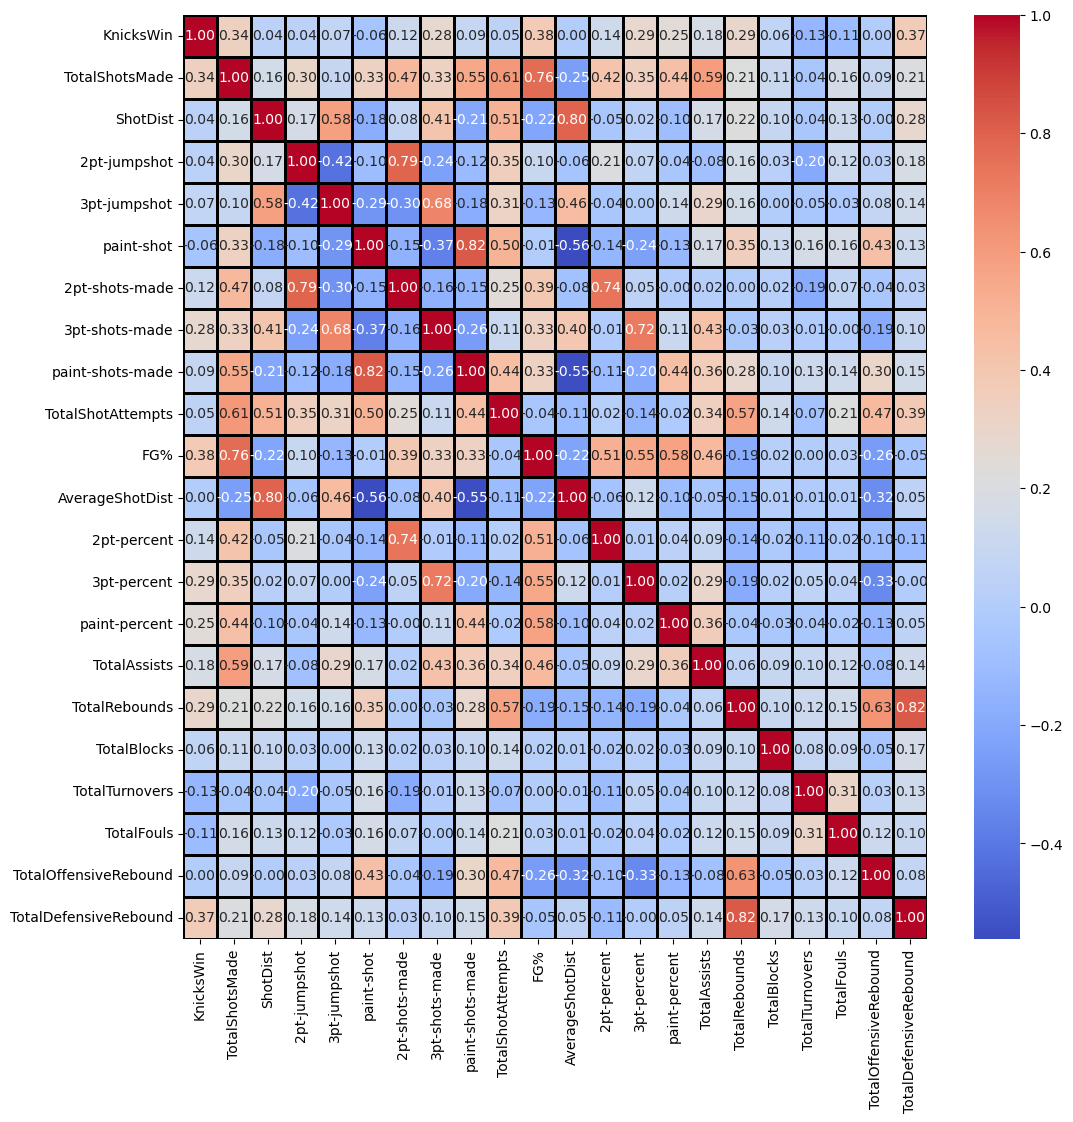

In [86]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=1, linecolor='black')
plt.show()

In [87]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   KnicksWin              307 non-null    float64
 1   TotalShotsMade         307 non-null    int64  
 2   ShotDist               307 non-null    float64
 3   2pt-jumpshot           307 non-null    int64  
 4   3pt-jumpshot           307 non-null    int64  
 5   paint-shot             307 non-null    int64  
 6   2pt-shots-made         307 non-null    int64  
 7   3pt-shots-made         307 non-null    int64  
 8   paint-shots-made       307 non-null    int64  
 9   TotalShotAttempts      307 non-null    int64  
 10  FG%                    307 non-null    float64
 11  AverageShotDist        307 non-null    float64
 12  2pt-percent            307 non-null    float64
 13  3pt-percent            307 non-null    float64
 14  paint-percent          307 non-null    float64
 15  TotalA

In [88]:
# X is the features we want to use  'FG%', 'AverageShotDist', '2pt-percent', '3pt-percent', 'paint-percent', 'TotalAssists', 'TotalRebounds', 'TotalBlocks', 'TotalTurnovers', 'TotalFouls', 'TotalOffensiveRebound', 'TotalDefensiveRebound'
X = grouped_df[['FG%', 'AverageShotDist', '2pt-percent', '3pt-percent', 'paint-percent', 'TotalAssists', 'TotalRebounds', 'TotalBlocks', 'TotalTurnovers', 'TotalFouls', 'TotalOffensiveRebound', 'TotalDefensiveRebound']]


# y is the target
y = grouped_df['KnicksWin']

# remove the NaN values with 0
X.fillna(0, inplace=True)

# Split the data into training and testing sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\611114337.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.7012987012987013
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68        36
         1.0       0.71      0.73      0.72        41

    accuracy                           0.70        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.70      0.70      0.70        77



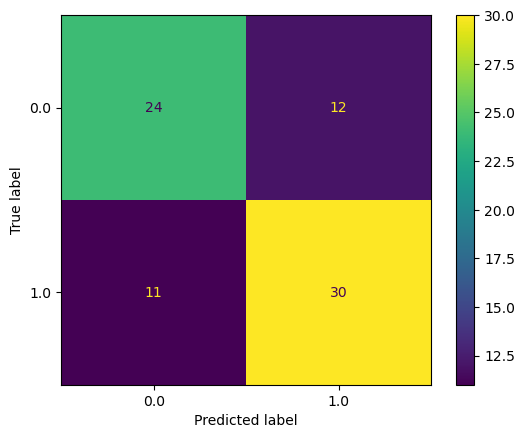

In [89]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the DecisionTreeClassifier to the training data
dt.fit(X_train, y_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict the labels of the test set: y_pred
y_pred = dt.predict(X_test)

# Compute the accuracy of the predictions: accuracy
print(accuracy_score(y_test, y_pred))

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# plot the confusion matrix using ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

1.0
0.7012987012987013


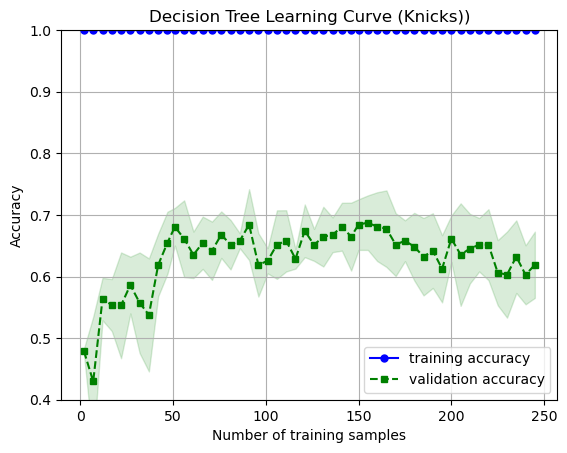

In [90]:
# see if the model is overfitting
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

# plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
# add Title
plt.title('Decision Tree Learning Curve (Knicks))')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.show()

In [91]:
# plot feature importance using plotly
import plotly.express as px

fig = px.bar(x=X.columns, y=dt.feature_importances_)
fig.update_layout(title=' Decision Tree Feature Importance (Knicks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Accuracy achieved by using entropy:  0.7272727272727273


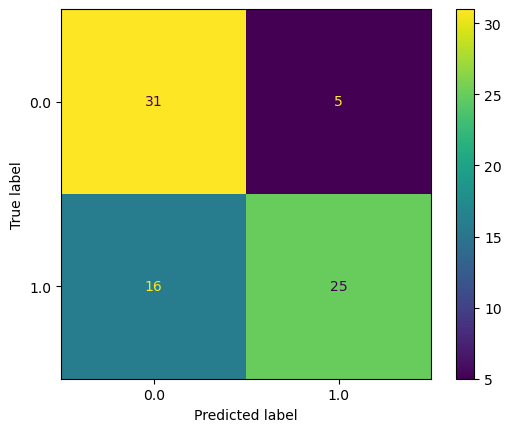

In [92]:
# optimize the dtree
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
print('Accuracy achieved by using entropy: ', accuracy_entropy)

#print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_entropy.classes_)
disp.plot()


0.7217391304347827
0.7272727272727273


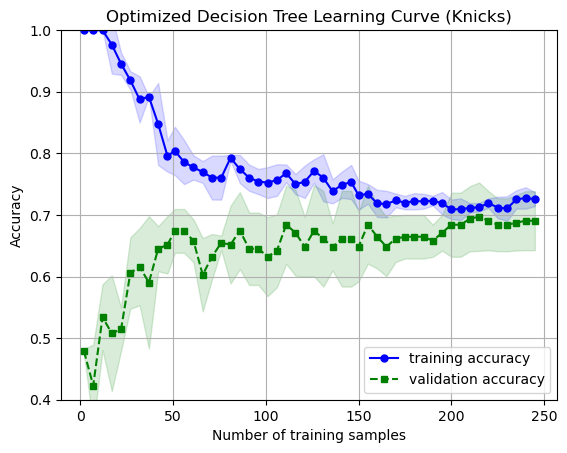

In [93]:
# plot learning curve
from sklearn.model_selection import learning_curve

print(dt_entropy.score(X_train, y_train))
print(dt_entropy.score(X_test, y_test))

train_sizes, train_scores, test_scores = learning_curve(dt_entropy, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.title('Optimized Decision Tree Learning Curve (Knicks)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.show()

In [94]:
# feature importance using plotly
import plotly.express as px

fig = px.bar(x=X.columns, y=dt_entropy.feature_importances_)
fig.update_layout(title='Optimized Decision Tree Feature Importance (Knicks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

0.7792207792207793


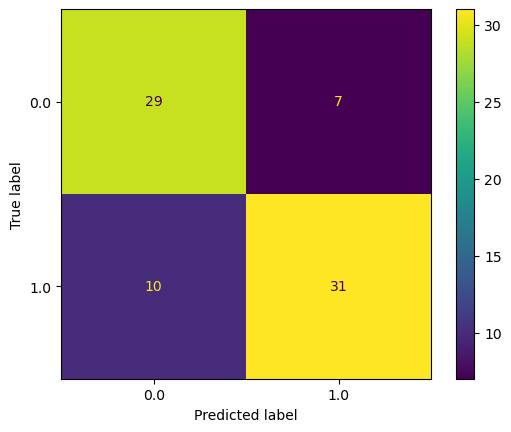

In [95]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the RandomForestClassifier to the training data
rf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test)

# Compute the accuracy of the predictions: accuracy
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [96]:
# plot feature importance using plotly

fig = px.bar(x=X.columns, y=rf.feature_importances_)
fig.update_layout(title=' Random Forest Feature Importance (Knicks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [97]:
# train and test accuracy
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.7792207792207793


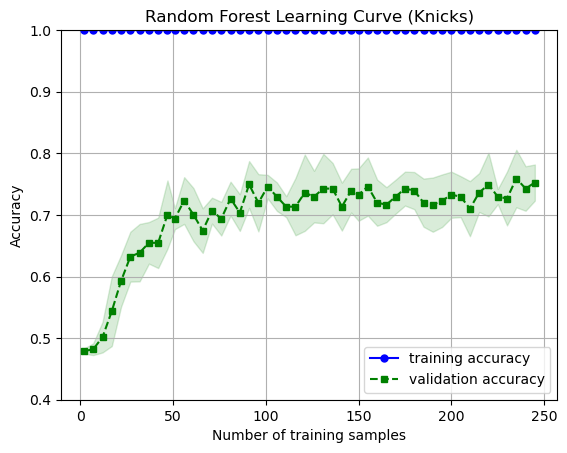

In [98]:
# plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.title('Random Forest Learning Curve (Knicks)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.show()

In [99]:
# reduce overfitting for random forest using cross-validation

# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Compute the array containing the folds CV scores: cv_scores
cv_scores = cross_val_score(rf, X, y, cv=10)

# Print the 10-folds CV scores
print(cv_scores)

# Print the mean of the folds CV scores
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500], # number of trees in the forest
    'max_features': ['log2', 'auto', 'sqrt'], # number of features to consider when looking for the best split
    'min_samples_leaf': [2, 10, 30] # minimum number of samples required to be at a leaf node
}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, scoring='accuracy', n_jobs=-1) # cv=3 means 3-fold cross-validation

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

[0.80645161 0.74193548 0.74193548 0.61290323 0.80645161 0.70967742
 0.67741935 0.76666667 0.83333333 0.7       ]
Average 10-Fold CV Score: 0.7396774193548387
Accuracy: 0.7532467532467533


In [100]:
# print new training and test accuracy
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

1.0
0.7532467532467533


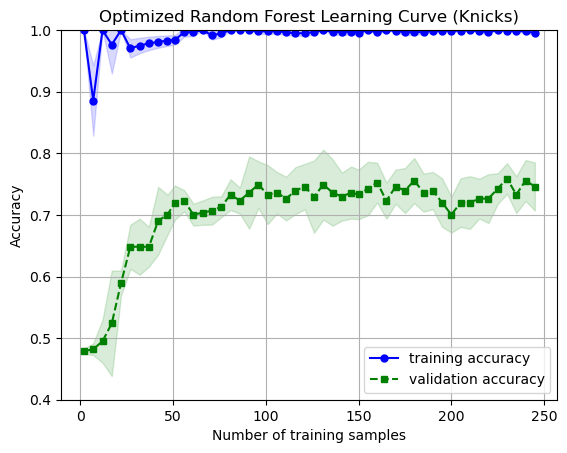

In [101]:
# plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.title('Optimized Random Forest Learning Curve (Knicks)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.show()

In [102]:
# Feature importance using plotly
import plotly.express as px

fig = px.bar(x=X.columns, y=best_model.feature_importances_)
fig.update_layout(title='Optimized Random Forest Feature Importance (Knicks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [103]:
# lets do the same for the bucks data

bucksdf = pd.read_csv('C:/Users/almad/OneDrive/Desktop/Knicks/BUCKS_PBP_2019_2023.csv')

In [104]:
# Games in bucks data
bucksdf['Date'].nunique()

354

In [105]:
def bucks_players(bucksdf):
    bucks_players = []
    for i in range(len(bucksdf)):
        if (bucksdf['HomeTeam'][i] == 'MIL') and (bucksdf['HomePlay'][i] is not np.nan):
            bucks_players.append(bucksdf['Shooter'][i])
        elif (bucksdf['AwayTeam'][i] == 'MIL') and (bucksdf['AwayPlay'][i] is not np.nan):
            bucks_players.append(bucksdf['Shooter'][i])
    return bucks_players

bucks_players = bucks_players(bucksdf)

bucks_players = pd.DataFrame(bucks_players, columns=['Player'])

bucks_players = bucks_players['Player'].unique()

print("There have been", len(bucks_players), "players that have played for the Bucks from 2019-2023")

bucks_players = pd.DataFrame(bucks_players, columns=['Player'])

bucks_players['Count'] = bucks_players['Player'].map(bucksdf['Shooter'].value_counts())

bucks_players.sort_values(by='Count', ascending=False, inplace=True)

bucks_players.reset_index(drop=True, inplace=True)

bucks_players['InvolvementRank'] = bucks_players.index + 1

#drop nan values
bucks_players.dropna(inplace=True)

bucks_players.head()

There have been 57 players that have played for the Bucks from 2019-2023


,Player,Count,InvolvementRank
0,G. Antetokounmpo - antetgi01,5746.0,1
1,K. Middleton - middlkh01,4104.0,2
2,J. Holiday - holidjr01,3449.0,3
3,B. Lopez - lopezbr01,2774.0,4
4,B. Portis - portibo01,2569.0,5


In [106]:
bucksdf.drop('URL', axis=1, inplace=True)

# Drop location column
bucksdf.drop('Location', axis=1, inplace=True)

# drop ViolationType column
bucksdf.drop('ViolationType', axis=1, inplace=True)

# drop ViolationPlayer column
bucksdf.drop('ViolationPlayer', axis=1, inplace=True)

# drop TimeoutTeam column
bucksdf.drop('TimeoutTeam', axis=1, inplace=True)

# drop FreeThrowShooter column
bucksdf.drop('FreeThrowShooter', axis=1, inplace=True)

# drop FreeThrowOutcome column
bucksdf.drop('FreeThrowOutcome', axis=1, inplace=True)

# drop FreeThrowNum column
bucksdf.drop('FreeThrowNum', axis=1, inplace=True)

# drop FoulType column
bucksdf.drop('FoulType', axis=1, inplace=True)


# drop Fouled column
bucksdf.drop('Fouled', axis=1, inplace=True)

# Drop TurnoverType column
bucksdf.drop('TurnoverType', axis=1, inplace=True)

# drop TurnoverCauser column
bucksdf.drop('TurnoverCauser', axis=1, inplace=True)

# drop TurnoverCause column
bucksdf.drop('TurnoverCause', axis=1, inplace=True)


# drop EnterGame and LeaveGame columns
bucksdf.drop('EnterGame', axis=1, inplace=True)
bucksdf.drop('LeaveGame', axis=1, inplace=True)

# JumpballAwayPlayer and JumpballHomePlayer and JumpballPoss column
bucksdf.drop('JumpballAwayPlayer', axis=1, inplace=True)
bucksdf.drop('JumpballHomePlayer', axis=1, inplace=True)
bucksdf.drop('JumpballPoss', axis=1, inplace=True)

# Drop Quarter column
bucksdf.drop('Quarter', axis=1, inplace=True)

# Drop SecLeft column
bucksdf.drop('SecLeft', axis=1, inplace=True)

bucksdf['Time'] = pd.to_datetime(bucksdf['Time'])

# convert the time to hours
bucksdf['Time'] = bucksdf['Time'].apply(lambda x: x.hour + x.minute / 60)

# create a new column called 'bucksWin' to indicate whether the bucks won or lost the game
bucksdf.loc[bucksdf['WinningTeam'] == 'MIL', 'BucksWin'] = 1

bucksdf.loc[bucksdf['WinningTeam'] != 'MIL', 'BucksWin'] = 0

bucksdf['GameType'] = bucksdf['GameType'].apply(lambda x: 1 if x == 'playoff' else 0)

# drop the winning team column
bucksdf.drop('WinningTeam', axis=1, inplace=True)

# drop HomePlay and AwayPlay columns
bucksdf.drop('HomePlay', axis=1, inplace=True)
bucksdf.drop('AwayPlay', axis=1, inplace=True)

# drop the HomeScore and AwayScore columns
bucksdf.drop('HomeScore', axis=1, inplace=True)
bucksdf.drop('AwayScore', axis=1, inplace=True)

# drop the HomeTeam and AwayTeam columns
bucksdf.drop('HomeTeam', axis=1, inplace=True)
bucksdf.drop('AwayTeam', axis=1, inplace=True)

In [107]:
# create a new dataframe with Shooter, ShotType, ShotOutcome, and ShotDist columns
bucksdf2 = bucksdf[['Shooter', 'ShotType', 'ShotOutcome', 'ShotDist', 'BucksWin', 'Date']]

# drop all rows with NaN values
bucksdf2.dropna(inplace=True)

bucksdf2.head()

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1382732231.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Shooter,ShotType,ShotOutcome,ShotDist,BucksWin,Date
1,P. Tucker - tuckepj01,3-pt jump shot,make,24.0,1.0,October 24 2019
7,E. Bledsoe - bledser01,2-pt layup,miss,3.0,1.0,October 24 2019
9,J. Harden - hardeja01,2-pt jump shot,miss,6.0,1.0,October 24 2019
11,B. Lopez - lopezbr01,3-pt jump shot,miss,27.0,1.0,October 24 2019
13,C. Capela - capelca01,2-pt layup,miss,2.0,1.0,October 24 2019


In [108]:
# Create a new column for 2pt shots
bucksdf2['2pt-jumpshot'] = bucksdf2['ShotType'].apply(lambda x: 1 if x in ['2-pt jump shot'] else 0)

# Create a new column for 3pt shots
bucksdf2['3pt-jumpshot'] = bucksdf2['ShotType'].apply(lambda x: 1 if x == '3-pt jump shot' else 0)

# Create a new column for paint shots
bucksdf2['paint-shot'] = bucksdf2['ShotType'].apply(lambda x: 1 if x in ['2-pt layup', '2-pt dunk', '2-pt hook shot'] else 0)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\2209715336.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\2209715336.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\2209715336.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [109]:
# If shot outcome is make then 1, if shot outcome is miss then 0
bucksdf2['ShotOutcome'] = bucksdf2['ShotOutcome'].apply(lambda x: 1 if x == 'make' else 0)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\542935454.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
bucks_player_list = ['G. Antetokounmpo - antetgi01',
 'K. Middleton - middlkh01',
 'J. Holiday - holidjr01',
 'B. Lopez - lopezbr01',
 'B. Portis - portibo01',
 'P. Connaughton - connapa01',
 'D. DiVincenzo - divindo01',
 'G. Allen - allengr01',
 'W. Matthews - matthwe02',
 'G. Hill - hillge01',
 'E. Bledsoe - bledser01',
 'J. Nwora - nworajo01',
 'B. Forbes - forbebr01',
 'J. Carter - carteje01',
 'T. Antetokounmpo - antetth01',
 'K. Korver - korveky01',
 'R. Lopez - lopezro01',
 'E. İlyasova - ilyaser01',
 'D. Augustin - augusdj01',
 'S. Brown - brownst02',
 'S. Ibaka - ibakase01',
 'M. Beauchamp - beaucma01',
 'P. Tucker - tuckepj01',
 'D. Wilson - wilsodj01',
 'S. Mamukelashvili - mamuksa01',
 'J. Ingles - inglejo01',
 'J. Teague - teaguje01',
 'R. Hood - hoodro01',
 'M. Williams - willima02',
 'D. Cousins - couside01',
 'A. Green - greenaj01',
 'S. Ojeleye - ojelese01',
 'S. Merrill - merrisa01',
 'T. Craig - craigto01',
 'J. Robinson - robinju01',
 'L. Wigginton - wiggili01',
 'M. Diakite - diakima01',
 'F. Mason - masonfr01',
 'J. Smart - smartja01',
 'L. Galloway - gallola01',
 'J. Jackson - jacksju01',
 'E. Bryant - bryanel01',
 'D. Bembry - bembrde01',
 'R. Kurucs - kurucro01',
 'G. Monroe - monrogr01',
 'D. Bender - bendedr01',
 'A. Toupane - toupaax01',
 'R. Tucker - tuckera01',
 'L. Kornet - kornelu01',
 'G. Kalaitzakis - kalaige01',
 'J. Adams - adamsja01',
 'L. Vildoza - vildolu01',
 'J. Dowtin - dowtije01']

bucks_filtereddf = bucksdf2[bucksdf2['Shooter'].isin(player_list)]

bucks_filtereddf.head()

,Shooter,ShotType,ShotOutcome,ShotDist,BucksWin,Date,2pt-jumpshot,3pt-jumpshot,paint-shot
55,D. House - houseda01,2-pt jump shot,0,16.0,1.0,October 24 2019,1,0,0
85,A. Rivers - riverau01,3-pt jump shot,0,27.0,1.0,October 24 2019,0,1,0
130,A. Rivers - riverau01,3-pt jump shot,0,28.0,1.0,October 24 2019,0,1,0
195,D. House - houseda01,3-pt jump shot,1,25.0,1.0,October 24 2019,0,1,0
197,D. House - houseda01,3-pt jump shot,1,23.0,1.0,October 24 2019,0,1,0


In [111]:
bucks_filtereddf['Shooter'].shape

# Add a column called 2pt-shots made, 3pt-shots made, and paint shots made
# If ShotOutcome is 1 and 2pt-jumpshot is 1 then add 1 to total 2pt shots made colum
# If ShotOutcome is 1 and 3pt-jumpshot is 1 then add 1 to total 3pt shots made colum
# If ShotOutcome is 1 and paint-shot is 1 then add 1 to total paint shots made colum
bucks_filtereddf['2pt-shots-made'] = bucks_filtereddf.apply(lambda x: 1 if x['ShotOutcome'] == 1 and x['2pt-jumpshot'] == 1 else 0, axis=1)
bucks_filtereddf['3pt-shots-made'] = bucks_filtereddf.apply(lambda x: 1 if x['ShotOutcome'] == 1 and x['3pt-jumpshot'] == 1 else 0, axis=1)
bucks_filtereddf['paint-shots-made'] = bucks_filtereddf.apply(lambda x: 1 if x['ShotOutcome'] == 1 and x['paint-shot'] == 1 else 0, axis=1)

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1359207214.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1359207214.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\almad\AppData\Local\Temp\ipykernel_23744\1359207214.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [112]:
#  Group by date and knicks win
bucks_grouped_df = bucks_filtereddf.groupby(['Date', 'BucksWin']).sum()

bucks_grouped_df.head()

,,ShotOutcome,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made
Date,BucksWin,,,,,,,,
April 1 2022,0.0,18,335.0,10,7,12,7,1,10
April 11 2021,1.0,6,200.0,4,6,2,1,4,1
April 14 2021,1.0,6,136.0,4,2,7,1,1,4
April 15 2021,1.0,4,97.0,3,2,4,0,1,3
April 17 2021,0.0,2,86.0,1,3,1,0,1,1


In [113]:
# reset the index
bucks_grouped_df.reset_index(inplace=True)

In [114]:
# Create a new column for total shot attempts
bucks_grouped_df['TotalShotAttempts'] = bucks_grouped_df['2pt-jumpshot'] + bucks_grouped_df['3pt-jumpshot'] + bucks_grouped_df['paint-shot']

# Field goal percentage = ShotOutcome / TotalShotAttempts
bucks_grouped_df['FG%'] = bucks_grouped_df['ShotOutcome'] / bucks_grouped_df['TotalShotAttempts']

# Change ShotDist column to mean, ShotDist / TotalShotAttempts
bucks_grouped_df['AverageShotDist'] = bucks_grouped_df['ShotDist'] / bucks_grouped_df['TotalShotAttempts']

# Add a column for 2pt-percent, 3pt-percent, and paint-percent
bucks_grouped_df['2pt-percent'] = bucks_grouped_df['2pt-shots-made'] / bucks_grouped_df['2pt-jumpshot']
bucks_grouped_df['3pt-percent'] = bucks_grouped_df['3pt-shots-made'] / bucks_grouped_df['3pt-jumpshot']
bucks_grouped_df['paint-percent'] = bucks_grouped_df['paint-shots-made'] / bucks_grouped_df['paint-shot']

#rename ShotOutcome column to TotalShotsMade
bucks_grouped_df.rename(columns={'ShotOutcome': 'TotalShotsMade'}, inplace=True)

bucks_grouped_df.head()

,Date,BucksWin,TotalShotsMade,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made,TotalShotAttempts,FG%,AverageShotDist,2pt-percent,3pt-percent,paint-percent
0,April 1 2022,0.0,18,335.0,10,7,12,7,1,10,29,0.620690,11.551724,0.70,0.142857,0.833333
1,April 11 2021,1.0,6,200.0,4,6,2,1,4,1,12,0.500000,16.666667,0.25,0.666667,0.500000
2,April 14 2021,1.0,6,136.0,4,2,7,1,1,4,13,0.461538,10.461538,0.25,0.500000,0.571429
3,April 15 2021,1.0,4,97.0,3,2,4,0,1,3,9,0.444444,10.777778,0.00,0.500000,0.750000
4,April 17 2021,0.0,2,86.0,1,3,1,0,1,1,5,0.400000,17.200000,0.00,0.333333,1.000000


In [115]:
# Filter bucksdf to only include rows with players from the bucks_player_list
filtered_bucksdf = bucksdf[bucksdf['Assister'].isin(bucks_player_list) | bucksdf['Rebounder'].isin(bucks_player_list) | bucksdf['Blocker'].isin(bucks_player_list) | bucksdf['TurnoverPlayer'].isin(bucks_player_list) | bucksdf['Fouler'].isin(bucks_player_list)]

# Add Assister, Rebounder, ReboundType, and Blocker columns to the dataframe
bucks_grouped_df['TotalAssists'] = np.nan
bucks_grouped_df['TotalRebounds'] = np.nan
bucks_grouped_df['TotalBlocks'] = np.nan
bucks_grouped_df['TotalTurnovers'] = np.nan
bucks_grouped_df['TotalFouls'] = np.nan
bucks_grouped_df['TotalOffensiveRebound'] = np.nan
bucks_grouped_df['TotalDefensiveRebound'] = np.nan

# Loop through the filtered_bucksdf DataFrame and update the bucks_grouped_df DataFrame based on the date
for index, row in filtered_bucksdf.iterrows():
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalAssists'] = filtered_bucksdf[filtered_bucksdf['Date'] == row['Date']]['Assister'].count()
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalRebounds'] = filtered_bucksdf[filtered_bucksdf['Date'] == row['Date']]['Rebounder'].count()
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalBlocks'] = filtered_bucksdf[filtered_bucksdf['Date'] == row['Date']]['Blocker'].count()
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalTurnovers'] = filtered_bucksdf[filtered_bucksdf['Date'] == row['Date']]['TurnoverPlayer'].count()
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalFouls'] = filtered_bucksdf[filtered_bucksdf['Date'] == row['Date']]['Fouler'].count()
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalOffensiveRebound'] = filtered_bucksdf[(filtered_bucksdf['Date'] == row['Date']) & (filtered_bucksdf['ReboundType'] == 'offensive')]['ReboundType'].count()
    bucks_grouped_df.loc[bucks_grouped_df['Date'] == row['Date'], 'TotalDefensiveRebound'] = filtered_bucksdf[(filtered_bucksdf['Date'] == row['Date']) & (filtered_bucksdf['ReboundType'] == 'defensive')]['ReboundType'].count()

bucks_grouped_df.head()

,Date,BucksWin,TotalShotsMade,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made,...,2pt-percent,3pt-percent,paint-percent,TotalAssists,TotalRebounds,TotalBlocks,TotalTurnovers,TotalFouls,TotalOffensiveRebound,TotalDefensiveRebound
0,April 1 2022,0.0,18,335.0,10,7,12,7,1,10,...,0.70,0.142857,0.833333,31.0,38.0,5.0,16.0,20.0,13.0,25.0
1,April 11 2021,1.0,6,200.0,4,6,2,1,4,1,...,0.25,0.666667,0.500000,28.0,56.0,7.0,11.0,15.0,12.0,44.0
2,April 14 2021,1.0,6,136.0,4,2,7,1,1,4,...,0.25,0.500000,0.571429,26.0,52.0,4.0,16.0,20.0,7.0,45.0
3,April 15 2021,1.0,4,97.0,3,2,4,0,1,3,...,0.00,0.500000,0.750000,25.0,51.0,1.0,8.0,16.0,14.0,37.0
4,April 17 2021,0.0,2,86.0,1,3,1,0,1,1,...,0.00,0.333333,1.000000,28.0,49.0,1.0,17.0,9.0,13.0,36.0


In [116]:
# Drop the date column
bucks_grouped_df.drop('Date', axis=1, inplace=True)

In [117]:
# check for null values
bucks_grouped_df.isnull().sum()

BucksWin                  0
TotalShotsMade            0
ShotDist                  0
2pt-jumpshot              0
3pt-jumpshot              0
paint-shot                0
2pt-shots-made            0
3pt-shots-made            0
paint-shots-made          0
TotalShotAttempts         0
FG%                       0
AverageShotDist           0
2pt-percent              20
3pt-percent              12
paint-percent            15
TotalAssists              0
TotalRebounds             0
TotalBlocks               0
TotalTurnovers            0
TotalFouls                0
TotalOffensiveRebound     0
TotalDefensiveRebound     0
dtype: int64

In [118]:
# Fill null values with 0
bucks_grouped_df.fillna(0, inplace=True)

In [119]:
bucks_grouped_df.shape

(288, 22)

In [120]:
# correlation matrix
corr = bucks_grouped_df.corr()

# top 5 correlations with BucksWin
corr['BucksWin'].sort_values(ascending=False).head()

BucksWin                 1.000000
TotalDefensiveRebound    0.483673
TotalRebounds            0.419995
TotalAssists             0.391288
TotalBlocks              0.213650
Name: BucksWin, dtype: float64

<AxesSubplot:>

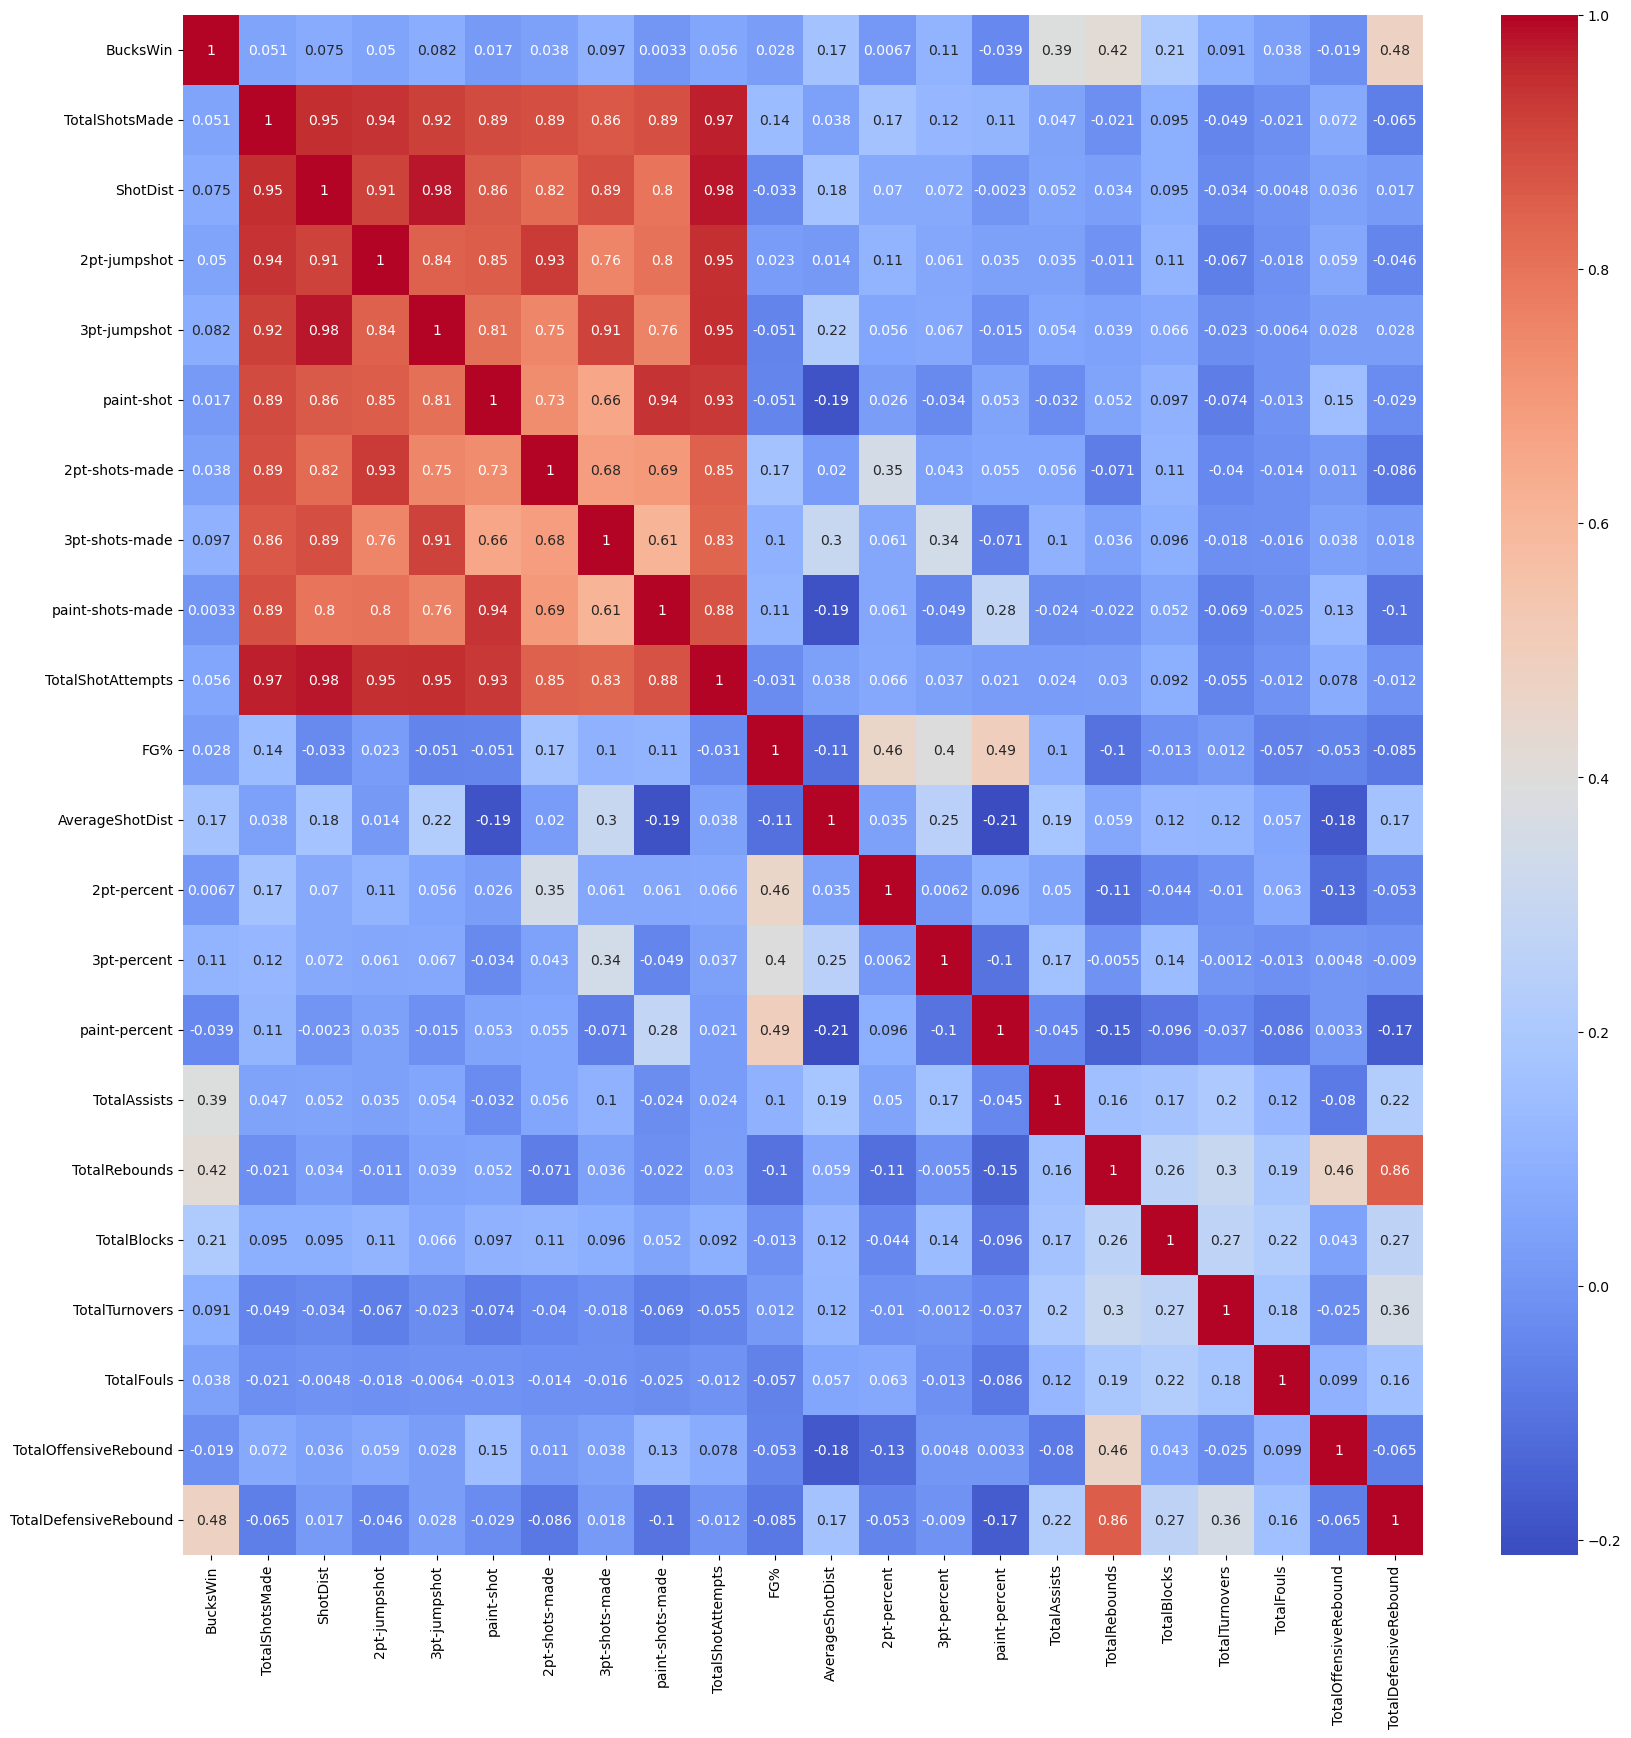

In [121]:
# plot the correlation matrix as a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [122]:
# Statistical summary of the data
bucks_grouped_df.describe()

,BucksWin,TotalShotsMade,ShotDist,2pt-jumpshot,3pt-jumpshot,paint-shot,2pt-shots-made,3pt-shots-made,paint-shots-made,TotalShotAttempts,...,2pt-percent,3pt-percent,paint-percent,TotalAssists,TotalRebounds,TotalBlocks,TotalTurnovers,TotalFouls,TotalOffensiveRebound,TotalDefensiveRebound
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.684028,7.388889,231.152778,4.666667,6.215278,5.229167,2.114583,2.312500,2.961806,16.111111,...,0.410572,0.348849,0.548143,25.666667,49.454861,4.729167,13.833333,18.895833,10.750000,38.704861
std,0.465711,8.192893,272.823023,6.061244,8.052236,6.082727,2.837786,3.036293,3.435103,19.050862,...,0.304799,0.268261,0.299663,5.194476,7.381919,2.428687,3.850879,4.412082,3.836375,6.560868
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,12.000000,19.000000,0.000000,4.000000,9.000000,2.000000,17.000000
25%,0.000000,4.000000,106.000000,2.000000,2.000000,2.000000,0.750000,1.000000,1.000000,8.000000,...,0.083333,0.160714,0.333333,22.000000,45.000000,3.000000,11.000000,16.000000,8.000000,34.000000
50%,1.000000,6.000000,168.500000,3.000000,4.000000,4.000000,1.000000,1.000000,2.000000,12.000000,...,0.500000,0.333333,0.500000,26.000000,49.000000,5.000000,14.000000,19.000000,11.000000,38.000000
75%,1.000000,8.000000,243.250000,5.000000,7.000000,6.000000,3.000000,3.000000,4.000000,15.250000,...,0.600000,0.500000,0.750000,29.000000,54.000000,6.000000,16.000000,21.000000,13.250000,43.000000
max,1.000000,53.000000,1551.000000,38.000000,56.000000,40.000000,19.000000,20.000000,25.000000,110.000000,...,1.000000,1.000000,1.000000,42.000000,73.000000,14.000000,25.000000,36.000000,22.000000,60.000000


In [123]:
# X is the features
X = bucks_grouped_df[['FG%', 'AverageShotDist', '2pt-percent', '3pt-percent', 'paint-percent', 'TotalAssists', 'TotalRebounds', 'TotalBlocks', 'TotalTurnovers', 'TotalFouls', 'TotalOffensiveRebound', 'TotalDefensiveRebound']]

# y is the target
y = bucks_grouped_df['BucksWin']

# Split the data into training and testing sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=1)

0.8076923076923077
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        18
         1.0       0.85      0.85      0.85        34

    accuracy                           0.81        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.81      0.81      0.81        52



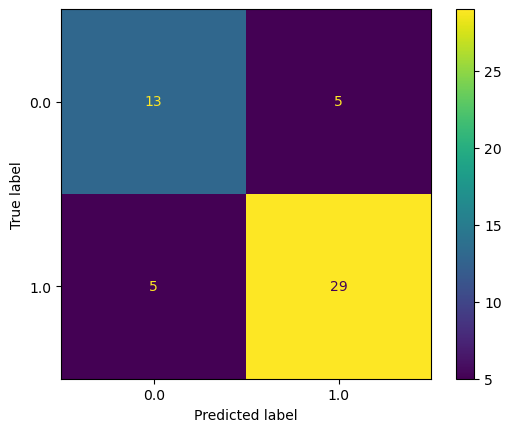

In [124]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the DecisionTreeClassifier to the training data
dt.fit(X_train, y_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict the labels of the test set: y_pred
y_pred = dt.predict(X_test)

# Compute the accuracy of the predictions: accuracy
print(accuracy_score(y_test, y_pred))

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# plot the confusion matrix using ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

In [125]:
# plot feature importance using plotly
fig = px.bar(x=X.columns, y=dt.feature_importances_)
fig.update_layout(title='Decision Tree Feature Importance (Bucks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [126]:
# print training and testing scores
print('Training Score: ', dt.score(X_train, y_train))
print('Testing Score: ', dt.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.8076923076923077


Training Score:  1.0
Testing Score:  0.8076923076923077


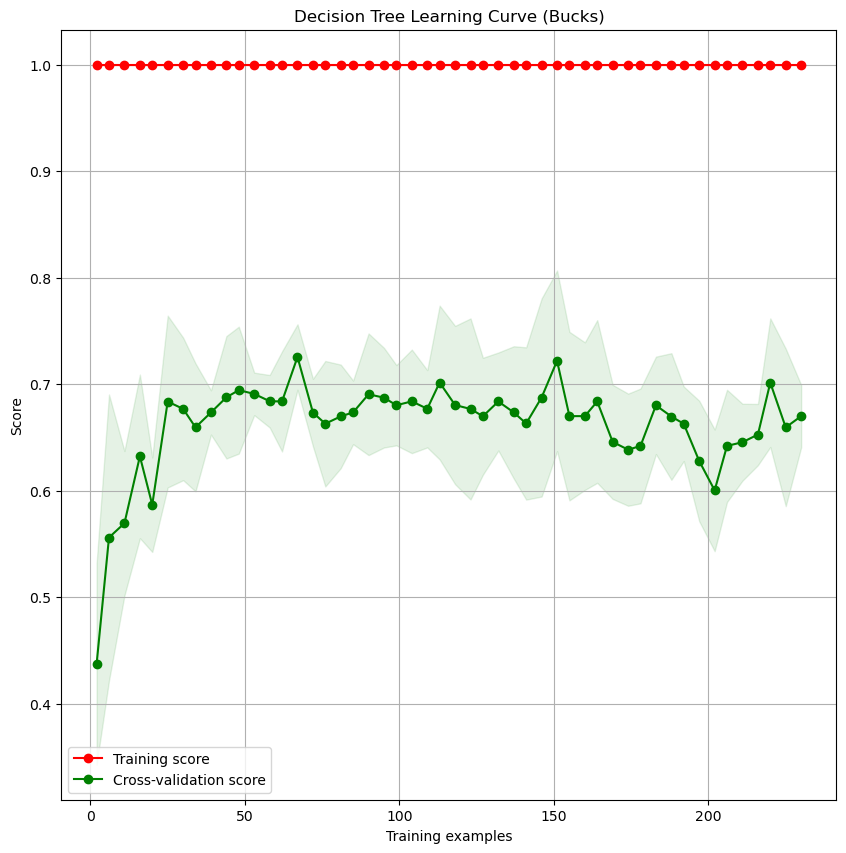

In [127]:
# plot learning curve
from sklearn.model_selection import learning_curve

# primt test and training scores
print('Training Score: ', dt.score(X_train, y_train))
print('Testing Score: ', dt.score(X_test, y_test))

train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,10))
plt.title('Decision Tree Learning Curve (Bucks)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()

0.8269230769230769
              precision    recall  f1-score   support

         0.0       0.85      0.61      0.71        18
         1.0       0.82      0.94      0.88        34

    accuracy                           0.83        52
   macro avg       0.83      0.78      0.79        52
weighted avg       0.83      0.83      0.82        52



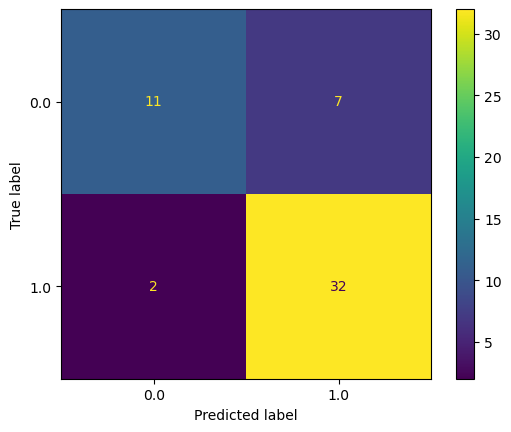

In [128]:
# prune the tree
dt_pruned = DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, random_state=42)

# fit the pruned tree to the training data
dt_pruned.fit(X_train, y_train)

# predict the labels of the test set
y_pred = dt_pruned.predict(X_test)

# compute the accuracy of the predictions
print(accuracy_score(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

# plot the confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_pruned.classes_)
disp.plot()

In [129]:
# print new training and testing scores
print('Training Score: ', dt_pruned.score(X_train, y_train))
print('Testing Score: ', dt_pruned.score(X_test, y_test))

Training Score:  0.7754237288135594
Testing Score:  0.8269230769230769


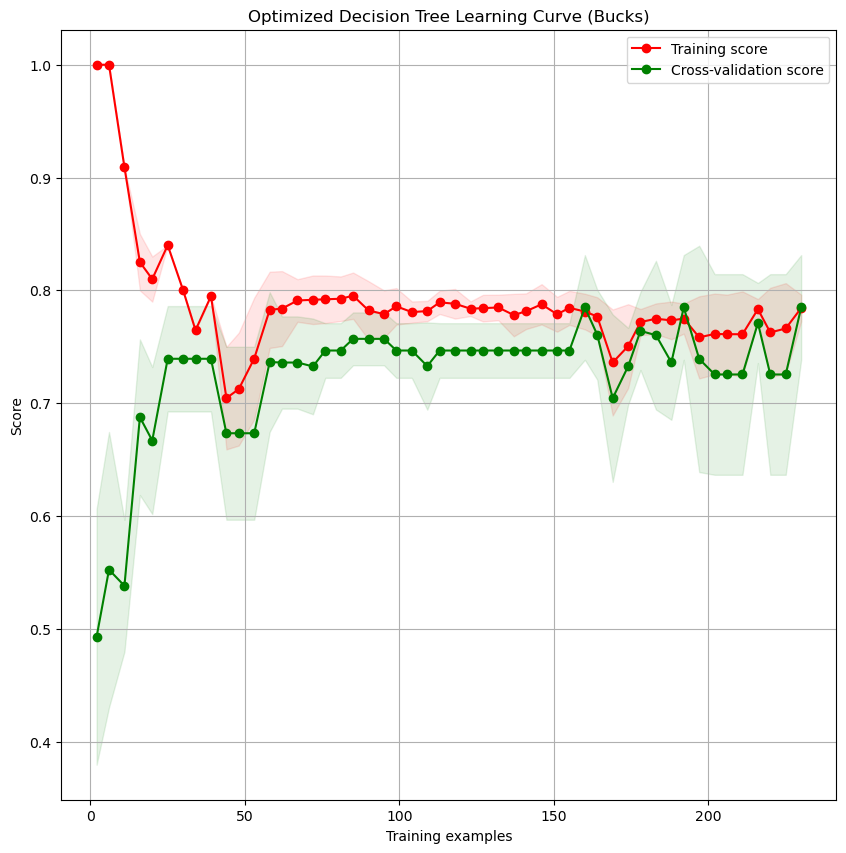

In [130]:
# plot learning curve
train_sizes, train_scores, test_scores = learning_curve(dt_pruned, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,10))
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Optimized Decision Tree Learning Curve (Bucks)')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [131]:
# plot feature importance using plotly
fig = px.bar(x=X.columns, y=dt_pruned.feature_importances_)
fig.update_layout(title='Optimized Decision Tree Feature Importance (Bucks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

0.7692307692307693
              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65        18
         1.0       0.81      0.85      0.83        34

    accuracy                           0.77        52
   macro avg       0.75      0.73      0.74        52
weighted avg       0.76      0.77      0.77        52



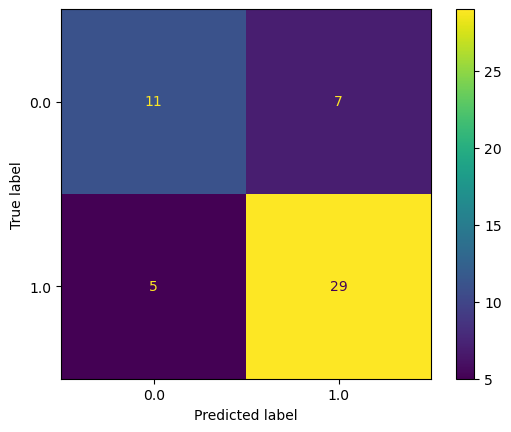

In [132]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the RandomForestClassifier to the training data
rf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test)

# Compute the accuracy of the predictions: accuracy
print(accuracy_score(y_test, y_pred))

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [133]:
# plot feature importance using plotly
fig = px.bar(x=X.columns, y=rf.feature_importances_)
fig.update_layout(title='Random Forest Feature Importance (Bucks)', xaxis_title='Features', yaxis_title='Importance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [134]:
# print training and testing scores
print('Training Score: ', rf.score(X_train, y_train))
print('Testing Score: ', rf.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.7692307692307693


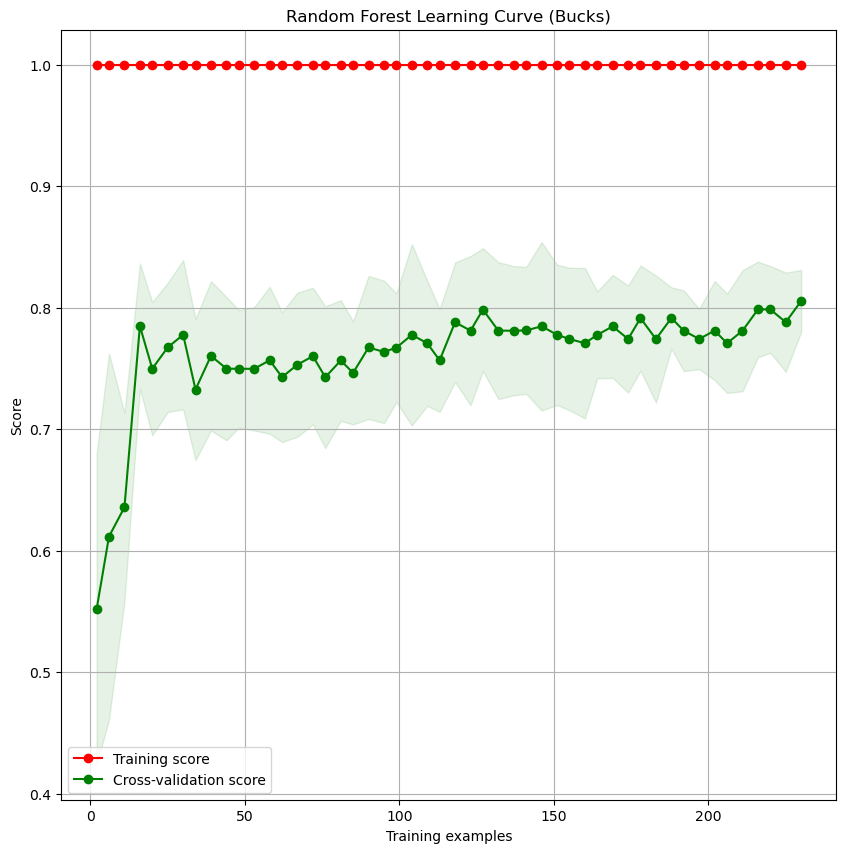

In [135]:
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,10))
plt.title('Random Forest Learning Curve (Bucks)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [136]:
# reduce overfitting for random forest using cross-validation

# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Compute the array containing the folds CV scores: cv_scores
cv_scores = cross_val_score(rf, X, y, cv=10)

# Print the 10-folds CV scores
print(cv_scores)

# Print the mean of the 10-folds CV scores
print("Average 20-Fold CV Score: {}".format(np.mean(cv_scores)))

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=10, scoring='accuracy', n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

[0.75862069 0.82758621 0.82758621 0.86206897 0.86206897 0.68965517
 0.68965517 0.72413793 0.92857143 0.82142857]
Average 20-Fold CV Score: 0.7991379310344827
Accuracy: 0.7884615384615384


In [137]:
# print test and training scores
print('Training Score: ', best_model.score(X_train, y_train))
print('Testing Score: ', best_model.score(X_test, y_test))

Training Score:  0.8432203389830508
Testing Score:  0.7884615384615384


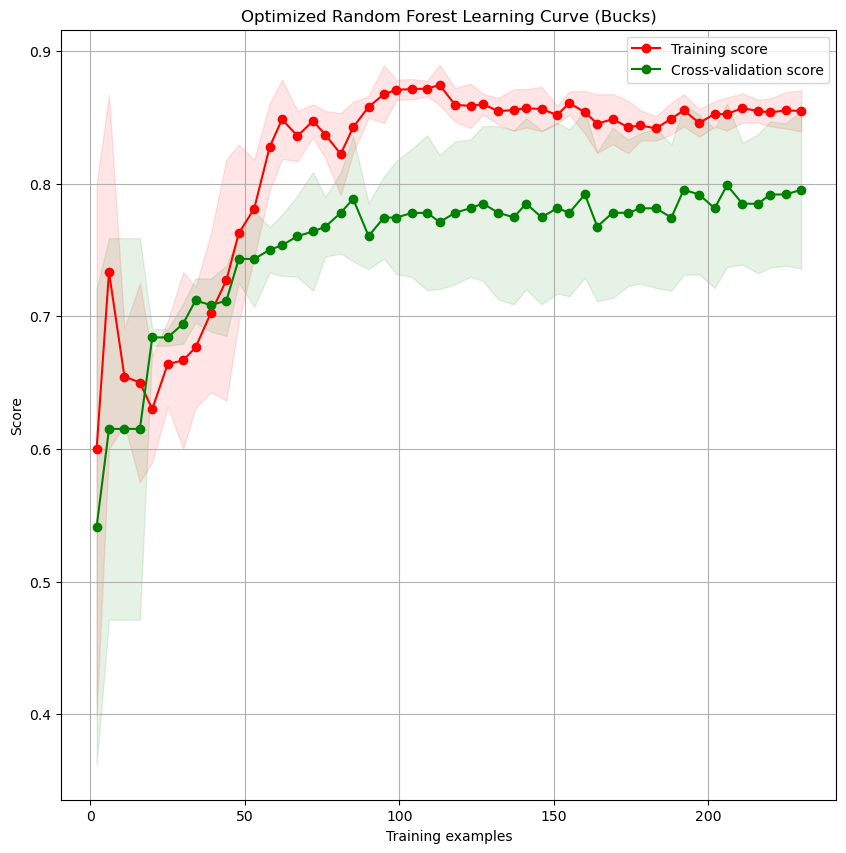

In [138]:
# plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,10))
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Optimized Random Forest Learning Curve (Bucks)')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()